# Problem Statement

Create a predictive model which will help to repeat blood donations
amongst donors

# Domain Analysis

1.Months since Last Donation:- It represents the number of months that have passed since the donor's last blood donation. This information can be useful in identifying donors who have not donated blood in a long time and may need to be encouraged to donate again.

2.Number of Donations: This represents the total number of blood donations made by the donor. This information can be useful in identifying donors who have made multiple donations and may be more likely to donate again in the future.

3.Total Volume Donated (c.c.): This column represents the total volume of blood donated by the donor, measured in cubic centimeters. This information can be useful in identifying donors who have made significant contributions to the blood bank and may be more committed to donating blood.


4.Months since First Donation: This feature represents the number of months that have passed since the donor's first blood donation. This information can be useful in identifying donors who have been donating blood for a long time and may be more likely to continue doing so.


5.Made Donation in March 2007: It represents whether or not the donor made a blood donation in March 2007. It is target column in the dataset. This information can be useful in identifying donors who have recently donated blood and may be more likely to donate again in the near future.

# Import the librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the datasets

In [3]:
df=pd.read_csv('C:/Users/Admin/Desktop/Internship Project datasets/PRCP-1011-BloodDonaPred/Data/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


# Basic chesks

In [6]:
df.head()           

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [8]:
df.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [12]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [14]:
df.dtypes

Unnamed: 0                     int64
Months since Last Donation     int64
Number of Donations            int64
Total Volume Donated (c.c.)    int64
Months since First Donation    int64
Made Donation in March 2007    int64
dtype: object

In [16]:
df.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

# Data preprocessing

In [20]:
df.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [22]:
# chech for duplicate values
df.duplicated().sum()

0

In [24]:
# drop of duplicate values
df.drop_duplicates(inplace=True)

In [26]:
# Unnamed: 0 : You can drop this column
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Exploratory Data Analysis

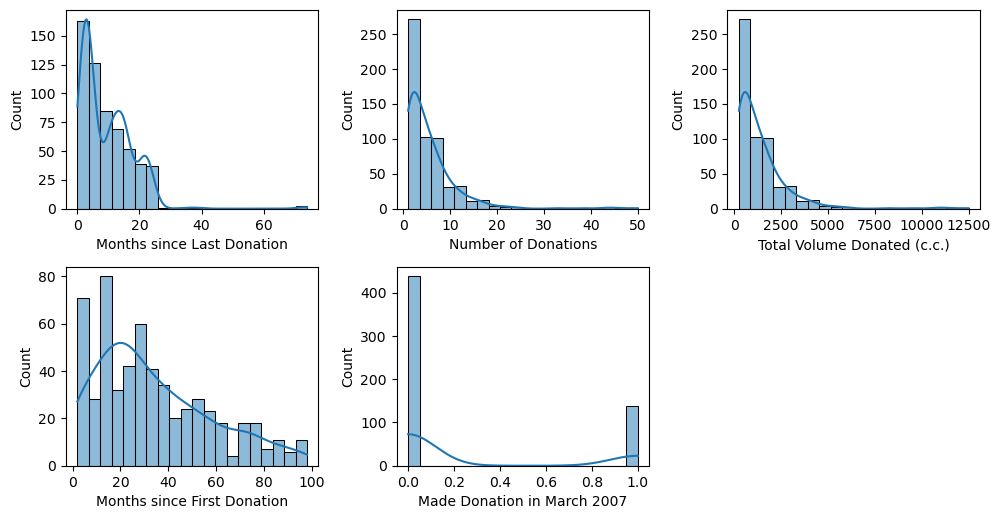

In [29]:
# Univariate Analysis

plt.figure(figsize=(10,10))
plotnumber = 1
for col in df:
    if plotnumber<6:
        ax = plt.subplot(4,3,plotnumber)
        sns.histplot(data=df,x=col,bins =20,kde=True)
        plt.xlabel(col,fontsize=10)
        plt.ylabel('Count',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='Made Donation in March 2007', ylabel='count'>

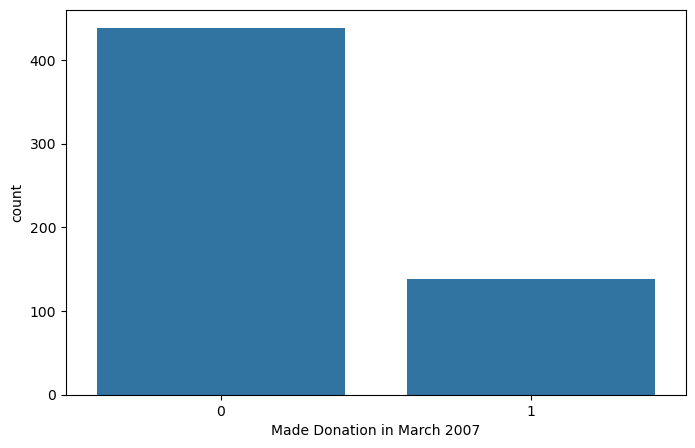

In [30]:
#Since it is a discrete target we have to go with countplot.
plt.figure(figsize=(8,5))
sns.countplot(x='Made Donation in March 2007',data=df)

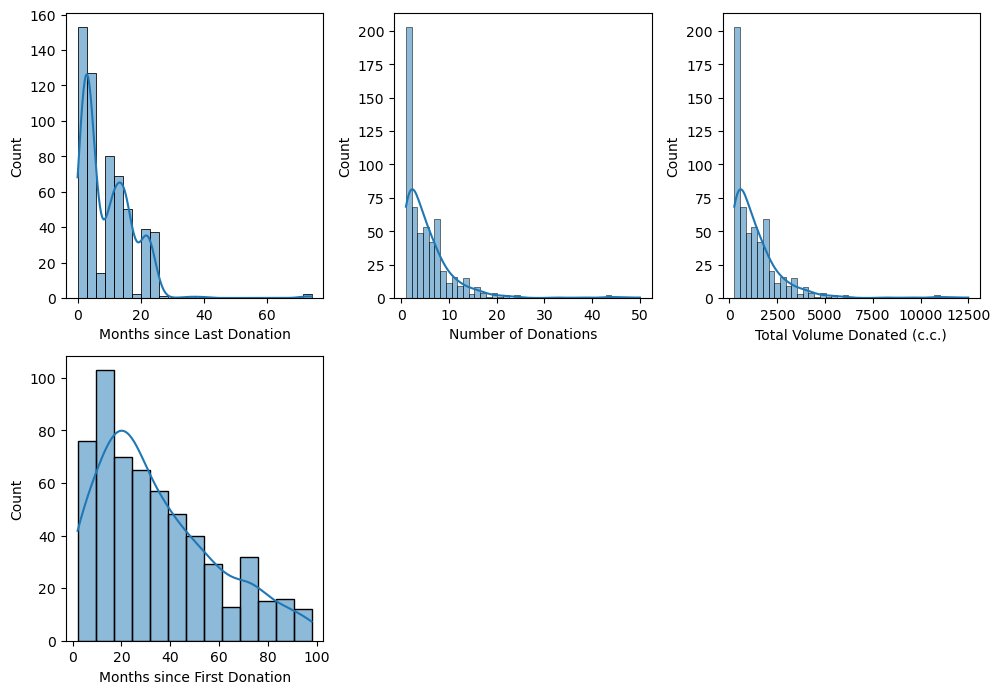

In [31]:
# histplot
plt.figure(figsize=(10,10))
plot=1

for i in df.columns[:-1]:
  plt.subplot(3,3,plot)
  sns.histplot(df[i],kde=True)
  plot+=1
plt.tight_layout()

In [32]:
# Move target column to the end
target = 'Made Donation in March 2007'
df = df[[col for col in df.columns if col != target] + [target]]


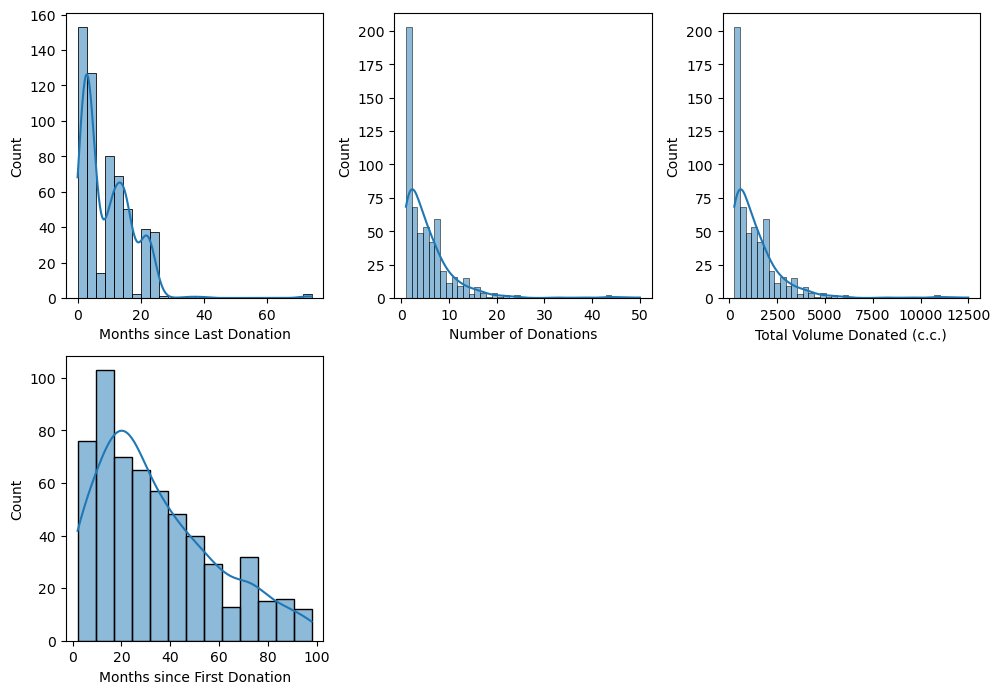

In [34]:
plt.figure(figsize=(10,10))
plot=1

for i in df.columns[:-1]:
  plt.subplot(3,3,plot)
  sns.histplot(df[i],kde=True)
  plot+=1
plt.tight_layout()

In [36]:
#This new DonationRatio feature helps capture donation frequency over time, which is useful for prediction.

df['DonationRatio'] = df['Number of Donations'] / (df['Months since First Donation'] + 1)
df['DonationRatio']

0      0.505051
1      0.448276
2      0.444444
3      0.434783
4      0.307692
         ...   
571    0.041667
572    0.034483
573    0.037736
574    0.025000
575    0.013699
Name: DonationRatio, Length: 576, dtype: float64

In [37]:
df.columns


Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007', 'DonationRatio'],
      dtype='object')

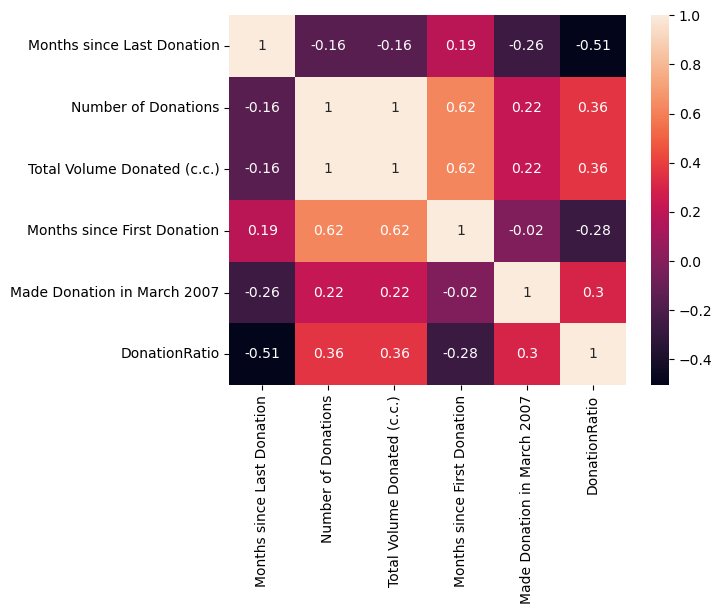

In [38]:
sns.heatmap(df.corr(),annot= True)
plt.show()

In [41]:
# Since the correlation between 'Number of Donations' and 'Total Volume Donated (c.c.)' is 1,
# it means one variable is a perfect linear transformation of the other.
# In this specific dataset, 'Total Volume Donated (c.c.)' is simply 'Number of Donations' multiplied by 250.
# This perfect correlation can cause issues in some models due to multicollinearity.
# We should remove one of these highly correlated features to avoid this issue.
# We'll drop the 'Total Volume Donated (c.c.)' column.

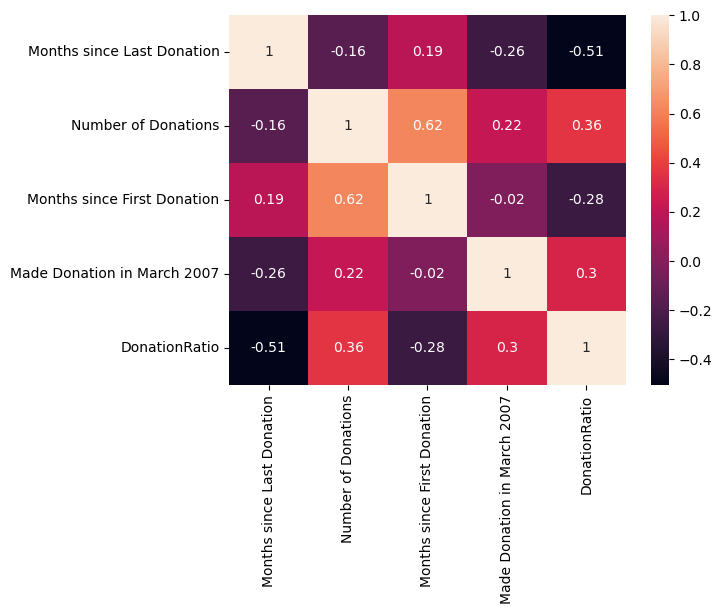

In [42]:

df.drop('Total Volume Donated (c.c.)', axis=1, inplace=True)

# Re-display the heatmap to confirm the change
sns.heatmap(df.corr(), annot=True)
plt.show()

# Insight

1. Strongest Predictor: DonationRatio (-0.51 correlation with Months since Last Donation)
DonationRatio = Frequency / Tenure.

This shows how regularly a person donates.

It has the highest positive correlation with the target (0.30) — more frequent donors are more likely to donate again.

Inversely correlated with Months since Last Donation: recent donors have high ratio.

 2. Recency Matters:
Months since Last Donation has a negative correlation (-0.26) with the target.

Interpretation: the more recently a person donated, the higher the chance they’ll donate again.

3. Frequency and Volume
Number of Donations and Total Volume Donated (c.c.) each have moderate positive correlation (~0.22) with future donation.

Frequent donors and those who donate more volume are more likely to return.

4. Tenure Isn’t That Important
Months since First Donation has very low correlation (-0.02) with the target.

So how long a person has been donating doesn't influence the prediction much by itself.

 Model Feature Selection:

1.DonationRatio (important!)

2. Months since Last Donation

3. Number of Donations

4. Months since First Donation 


# Log Transformation

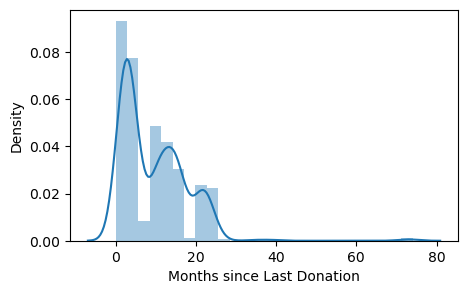

In [56]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(df['Months since Last Donation'])
plt.show()

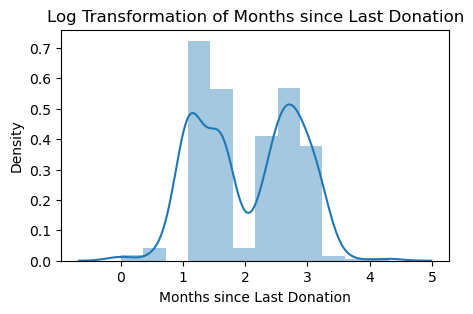

In [58]:

df['Months since Last Donation'] = np.log1p(df['Months since Last Donation'])


plt.figure(figsize=(5,3))
sns.distplot(df['Months since Last Donation'])
plt.title('Log Transformation of Months since Last Donation')
plt.show()

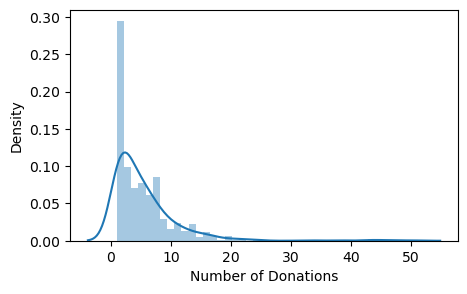

In [60]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(df['Number of Donations'])
plt.show()

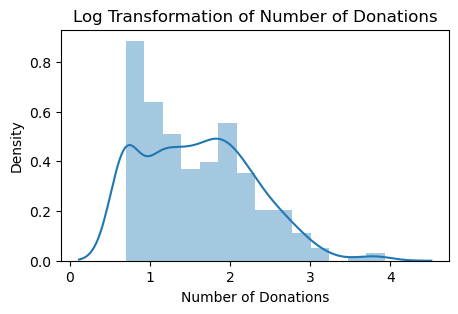

In [62]:
# log transformation to month since last donation

df['Number of Donations'] = np.log1p(df['Number of Donations'])

plt.figure(figsize=(5,3))
sns.distplot(df['Number of Donations'])
plt.title('Log Transformation of Number of Donations')
plt.show()

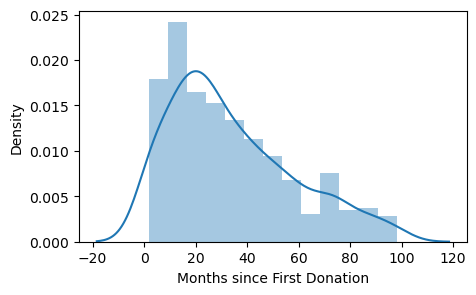

In [64]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(df['Months since First Donation'])
plt.show()

# Plotting a correlation heatmap in data analysis

<Axes: >

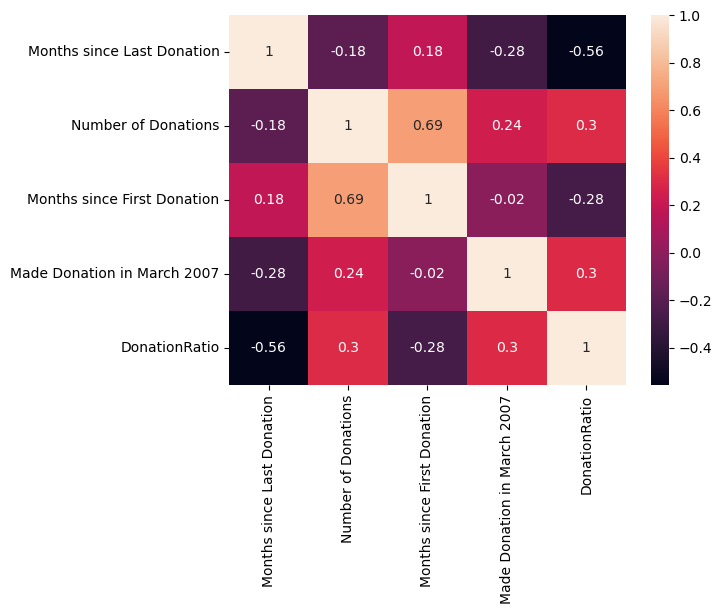

In [66]:
sns.heatmap(df.corr(),annot=True)

# Check for outlier


In [69]:
df.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Made Donation in March 2007,DonationRatio
0,1.098612,3.931826,98,1,0.505051
1,0.000000,2.639057,28,1,0.448276
2,0.693147,2.833213,35,1,0.444444
3,1.098612,3.044522,45,1,0.434783
4,0.693147,3.218876,77,0,0.307692


In [71]:
# Move target column to the end
target = 'Made Donation in March 2007'
df = df[[col for col in df.columns if col != target] + [target]]

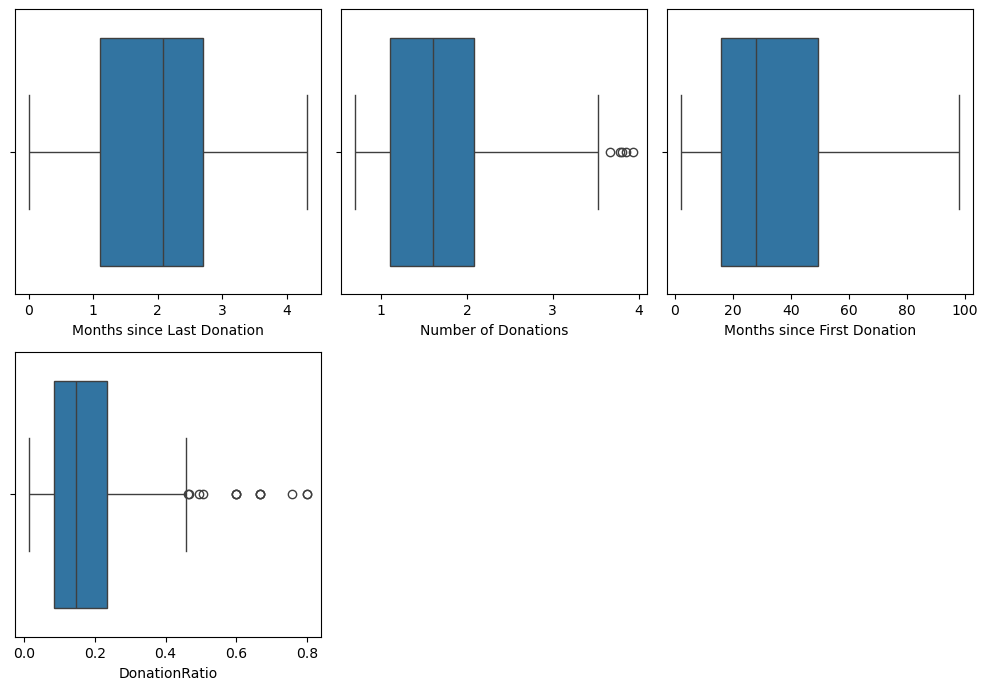

In [73]:
plt.figure(figsize=(10,10))
plot=1

for i in df.columns[:-1]:
  plt.subplot(3,3,plot)
  sns.boxplot(x=df[i])
  plt.xlabel(i)
  plot+=1
plt.tight_layout()

# Handling outlier

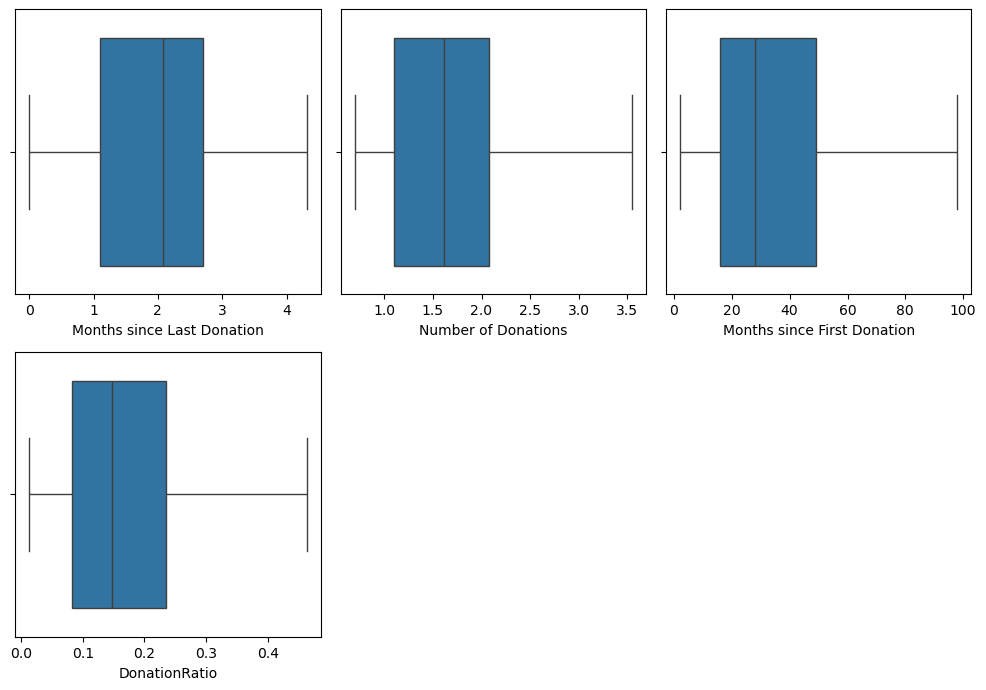

In [76]:


# Outlier handling using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper or lower bound
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply outlier handling to relevant columns
for column in ['Months since Last Donation', 'Number of Donations',
        'Months since First Donation','DonationRatio']:
    df = handle_outliers(df, column)

plt.figure(figsize=(10,10))
plot=1

for i in df.columns[:-1]:
  plt.subplot(3,3,plot)
  sns.boxplot(x=df[i])
  plt.xlabel(i)
  plot+=1
plt.tight_layout()


# Split Features and Target

In [79]:
# Separate features (X) and target (y)
X = df.drop('Made Donation in March 2007', axis=1)  # All columns except target
y = df['Made Donation in March 2007']               # Only the target column


# Train-Test Split

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training data shape: (460, 4)
Testing data shape: (116, 4)
Training target shape: (460,)
Testing target shape: (116,)


In [89]:
# xbg hypertunned on smot data without data leakage
from skopt.space import Integer, Real
from skopt import BayesSearchCV

In [91]:
# Re-split the data *before* applying SMOTE to ensure proper cross-validation without data leakage
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Added stratify for imbalanced data

In [93]:
# Apply SMOTE only to the training data to avoid data leakage into the test set

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

In [95]:
print("Class distribution after SMOTE (on training set):")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after SMOTE (on training set):
Made Donation in March 2007
0    350
1    350
Name: count, dtype: int64


# Model 1: XGBoost on SMOTE Data


Evaluation with XGBoost (trained on SMOTE data):
Accuracy: 0.853448275862069
Precision: 0.7727272727272727
Recall: 0.5862068965517241
F1-Score: 0.6666666666666666

Confusion Matrix:
 [[82  5]
 [12 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91        87
           1       0.77      0.59      0.67        29

    accuracy                           0.85       116
   macro avg       0.82      0.76      0.79       116
weighted avg       0.85      0.85      0.85       116


AUC Score with XGBoost: 0.8650


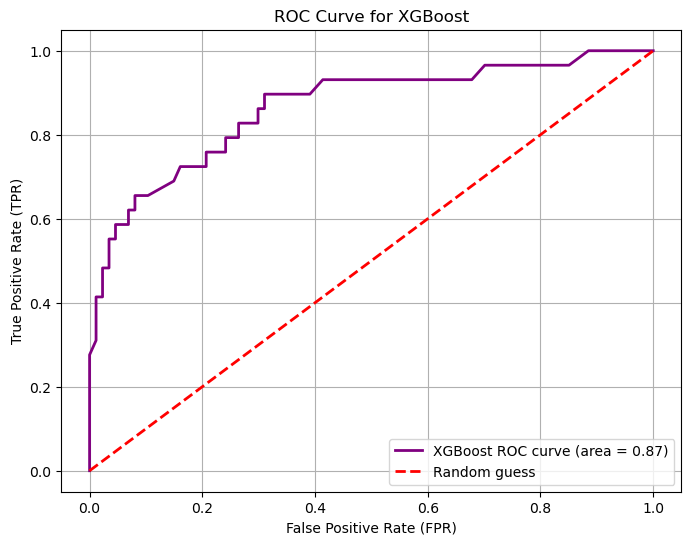

In [140]:

#!pip install xgboost

import xgboost as xgb

# Initialize the XGBoost Classifier
# Common parameters:
# n_estimators: Number of boosting rounds (trees)
# learning_rate: Step size shrinkage used in update to prevent overfitting
# max_depth: Maximum depth of a tree
# use_label_encoder: Set to False to avoid warnings about label encoding (deprecated in newer versions)
# eval_metric: Metric used for evaluation during training (e.g., 'logloss', 'auc', 'error')
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3,
                              use_label_encoder=False, # Important to set to False
                              eval_metric='logloss', # Or 'auc'
                              random_state=42)

# Train the model on the SMOTE-augmented training data
# It's generally better to train on the balanced data if using SMOTE
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions on the original test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for ROC/AUC

# Evaluate the XGBoost model
print("\nEvaluation with XGBoost (trained on SMOTE data):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-Score:", f1_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Calculate and plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
auc_score_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f'\nAUC Score with XGBoost: {auc_score_xgb:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label=f'XGBoost ROC curve (area = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Model 2: XGBoost with SMOTE + Bayesian Optimization

In [97]:
# Define the parameter space for Bayesian Optimization for XGBoost
param_space_xgb_smote = {
    'n_estimators': Integer(50, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'gamma': Real(0, 0.5),
    'reg_alpha': Real(0, 1),
    'reg_lambda': Real(1, 5),
    'scale_pos_weight': Real(1, 10) # Consider tuning scale_pos_weight for imbalanced data
}


In [99]:
# Initialize BayesSearchCV for XGBoost
from xgboost import XGBClassifier

opt_xgb_smote = BayesSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_space_xgb_smote,
    n_iter=50, # Number of iterations for Bayesian optimization
    cv=3,      # Cross-validation folds (applied to the resampled training data)
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='roc_auc' # Use AUC as a scoring metric for imbalanced data
)

In [101]:
# Perform Bayesian Optimization on the SMOTE-augmented training data
opt_xgb_smote.fit(X_train_resampled, y_train_resampled)

BayesSearchCV(cv=3,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constrain...
                             'n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=1, high=5, prior='uniform', transform='normalize'),
                             'scale_pos_weight': Real(low=1, high=10, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [103]:
# Print the best parameters found
print("\nBest parameters found by Bayesian Optimization for XGBoost (on SMOTE data):")
print(opt_xgb_smote.best_params_)



Best parameters found by Bayesian Optimization for XGBoost (on SMOTE data):
OrderedDict({'colsample_bytree': 0.705051979426657, 'gamma': 0.36386287158866254, 'learning_rate': 0.2387586688716479, 'max_depth': 5, 'n_estimators': 352, 'reg_alpha': 0.4141186324855385, 'reg_lambda': 2.4037253395965763, 'scale_pos_weight': 7.6555381077137845, 'subsample': 0.6522316555182531})


In [105]:
# Get the best XGBoost model from the Bayesian optimization
best_xgb_model_smote = opt_xgb_smote.best_estimator_

In [107]:


# Evaluate the best model on the original test set (X_test, y_test)
# We use the original test set to get an unbiased estimate of performance
y_pred_best_xgb_smote = best_xgb_model_smote.predict(X_test)
y_prob_best_xgb_smote = best_xgb_model_smote.predict_proba(X_test)[:, 1] # Probabilities for ROC/AUC


In [109]:
# Evaluate the best model after SMOTE and hyperparameter tuning
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix,classification_report,roc_curve

accuracy_best_xgb_smote = accuracy_score(y_test, y_pred_best_xgb_smote)
conf_matrix_best_xgb_smote = confusion_matrix(y_test, y_pred_best_xgb_smote)
class_report_best_xgb_smote = classification_report(y_test, y_pred_best_xgb_smote)
precision_best_xgb_smote = precision_score(y_test, y_pred_best_xgb_smote)
recall_best_xgb_smote = recall_score(y_test, y_pred_best_xgb_smote)
f1_best_xgb_smote = f1_score(y_test, y_pred_best_xgb_smote)
auc_score_best_xgb_smote = roc_auc_score(y_test, y_prob_best_xgb_smote)


In [113]:
print("\nBest XGBoost Model Performance on Original Test Set (after SMOTE and Bayesian Optimization):")
print(f"Accuracy: {accuracy_best_xgb_smote:.4f}")
print(f"Precision: {precision_best_xgb_smote:.4f}")
print(f"Recall: {recall_best_xgb_smote:.4f}")
print(f"F1-Score: {f1_best_xgb_smote:.4f}")
print(f"AUC Score: {auc_score_best_xgb_smote:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_best_xgb_smote)
print("\nClassification Report:")
print(class_report_best_xgb_smote)


Best XGBoost Model Performance on Original Test Set (after SMOTE and Bayesian Optimization):
Accuracy: 0.8103
Precision: 0.5778
Recall: 0.8966
F1-Score: 0.7027
AUC Score: 0.9261

Confusion Matrix:
[[68 19]
 [ 3 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        87
           1       0.58      0.90      0.70        29

    accuracy                           0.81       116
   macro avg       0.77      0.84      0.78       116
weighted avg       0.86      0.81      0.82       116



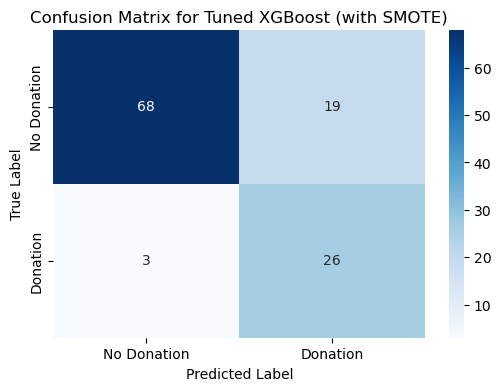

In [115]:
# Optional: Visualize the confusion matrix for the best XGBoost model after SMOTE and tuning
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best_xgb_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['No Donation', 'Donation'], yticklabels=['No Donation', 'Donation'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned XGBoost (with SMOTE)')
plt.show()


In [117]:
# Calculate ROC curve for the best tuned XGBoost model after SMOTE
fpr_best_xgb_smote, tpr_best_xgb_smote, thresholds_best_xgb_smote = roc_curve(y_test, y_prob_best_xgb_smote)


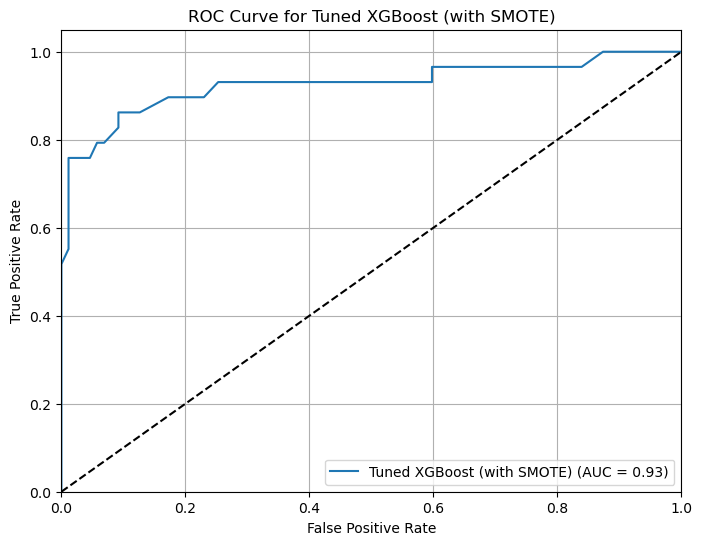

In [119]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_best_xgb_smote, tpr_best_xgb_smote, label=f'Tuned XGBoost (with SMOTE) (AUC = {auc_score_best_xgb_smote:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned XGBoost (with SMOTE)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Which Model to Choose?
| Metric       | XGBoost (SMOTE Only) | XGBoost (SMOTE + Tuning) |
|--------------|----------------------|---------------------------|
| Accuracy     | 0.8534               | 0.8103                    |
| Precision    | 0.7727               | 0.5778                    |
| Recall       | 0.5862               | 0.8966 ✅                  |
| F1-Score     | 0.6667               | 0.7027                    |
| AUC Score    | 0.8650               | 0.9261 ✅                  |


# Conclusion:

Overall, considering:

Higher F1-Score

Much better Recall

Best AUC Score (0.9261)

Model 2 (XGBoost with SMOTE + Bayesian Optimization) should be chosen as the better-performing model, especially in  imbalanced classification settings.

Model 2 (XGBoost + SMOTE + Bayesian Optimization) identifies 90% of actual donors, which aligns with our goal.




            -----------------------Learned Model---------------------------